<a href="https://colab.research.google.com/github/Rehaman-khan-hk/Dynamic-Product-Price-Predictor/blob/main/dynamic_pricing_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import os


In [57]:
data_path = '/content/drive/MyDrive/Dynamic_strategy_dataset/'


In [58]:
customers = pd.read_csv(os.path.join(data_path, 'olist_customers_dataset.csv'))


In [59]:
print(customers.shape)


(99441, 5)


In [60]:
orders = pd.read_csv(os.path.join(data_path, 'olist_orders_dataset.csv'))
order_items = pd.read_csv(os.path.join(data_path, 'olist_order_items_dataset.csv'))
order_payments = pd.read_csv(os.path.join(data_path, 'olist_order_payments_dataset.csv'))
order_reviews = pd.read_csv(os.path.join(data_path, 'olist_order_reviews_dataset.csv'))
products = pd.read_csv(os.path.join(data_path, 'olist_products_dataset.csv'))
sellers = pd.read_csv(os.path.join(data_path, 'olist_sellers_dataset.csv'))
customers = pd.read_csv(os.path.join(data_path, 'olist_customers_dataset.csv'))
geolocation = pd.read_csv(os.path.join(data_path, 'olist_geolocation_dataset.csv'))
category_translation = pd.read_csv(os.path.join(data_path, 'product_category_name_translation.csv'))


In [61]:
datasets = {
    'orders': orders,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'products': products,
    'sellers': sellers,
    'customers': customers,
    'geolocation': geolocation,
    'category_translation': category_translation
}

In [62]:
for name, df in datasets.items():
    print(f"\n--- {name.upper()} ---")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())
    display(df.head(2))


--- ORDERS ---
Shape: (99441, 8)
Columns: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00



--- ORDER_ITEMS ---
Shape: (112650, 7)
Columns: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93



--- ORDER_PAYMENTS ---
Shape: (103886, 5)
Columns: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39



--- ORDER_REVIEWS ---
Shape: (99224, 7)
Columns: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13



--- PRODUCTS ---
Shape: (32951, 9)
Columns: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0



--- SELLERS ---
Shape: (3095, 4)
Columns: ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP



--- CUSTOMERS ---
Shape: (99441, 5)
Columns: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP



--- GEOLOCATION ---
Shape: (1000163, 5)
Columns: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP



--- CATEGORY_TRANSLATION ---
Shape: (71, 2)
Columns: ['product_category_name', 'product_category_name_english']


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [63]:
payments = pd.read_csv(os.path.join(data_path, 'olist_order_payments_dataset.csv'))



In [64]:
reviews = pd.read_csv(os.path.join(data_path, 'olist_order_reviews_dataset.csv'))


In [65]:
# Merge order_items with orders (on order_id)
merged_df = pd.merge(order_items, orders, on='order_id', how='left')

# Merge with products (on product_id)
merged_df = pd.merge(merged_df, products, on='product_id', how='left')

# Merge with payments (on order_id)
merged_df = pd.merge(merged_df, payments, on='order_id', how='left')

# Merge with reviews (on order_id)
merged_df = pd.merge(merged_df, reviews, on='order_id', how='left')

# Merge with customers (on customer_id)
merged_df = pd.merge(merged_df, customers, on='customer_id', how='left')

# Show shape and sample
print("Unified dataset shape:", merged_df.shape)
merged_df.head()


Unified dataset shape: (118310, 36)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,97ca439bc427b48bc1cd7177abe71365,5.0,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,7b07bacd811c4117b742569b04ce3580,4.0,NaN,NaN,2017-05-13 00:00:00,2017-05-15 11:34:13,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,0c5b33dea94867d1ac402749e5438e8b,5.0,NaN,Chegou antes do prazo previsto e o produto sur...,2018-01-23 00:00:00,2018-01-23 16:06:31,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,f4028d019cb58564807486a6aaf33817,4.0,NaN,NaN,2018-08-15 00:00:00,2018-08-15 16:39:01,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,940144190dcba6351888cafa43f3a3a5,5.0,NaN,Gostei pois veio no prazo determinado .,2017-03-02 00:00:00,2017-03-03 10:54:59,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [66]:
# Check missing values in the merged dataset
missing_values = merged_df.isnull().sum().sort_values(ascending=False)
missing_values[missing_values > 0]


,0
review_comment_title,104418
review_comment_message,68628
order_delivered_customer_date,2588
product_description_lenght,1709
product_photos_qty,1709
product_name_lenght,1709
product_category_name,1709
order_delivered_carrier_date,1254
review_score,978
review_id,978


In [67]:
# Drop columns that aren't essential and have many missing values
columns_to_drop = ['review_comment_title', 'review_comment_message']
cleaned_df = merged_df.drop(columns=columns_to_drop)


In [68]:
# Drop rows with missing essential transaction/delivery info
essential_cols = [
    'payment_value', 'payment_type', 'order_approved_at',
    'order_delivered_customer_date', 'order_delivered_carrier_date'
]
cleaned_df = merged_df.dropna(subset=essential_cols)


In [69]:
cleaned_df = merged_df.dropna(subset=essential_cols)


In [70]:
# Convert to datetime
datetime_cols = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date', 'shipping_limit_date',
    'review_creation_date', 'review_answer_timestamp'
]

for col in datetime_cols:
    cleaned_df[col] = pd.to_datetime(cleaned_df[col])


<ipython-input-70-4971def440b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = pd.to_datetime(cleaned_df[col])
<ipython-input-70-4971def440b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[col] = pd.to_datetime(cleaned_df[col])
<ipython-input-70-4971def440b1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [71]:
# Delivery duration in days
cleaned_df['delivery_days'] = (cleaned_df['order_delivered_customer_date'] - cleaned_df['order_approved_at']).dt.days

# Estimated vs actual delivery (delay in days)
cleaned_df['delivery_delay'] = (cleaned_df['order_delivered_customer_date'] - cleaned_df['order_estimated_delivery_date']).dt.days

# Carrier shipment speed (days from approval to carrier pickup)
cleaned_df['shipping_days'] = (cleaned_df['order_delivered_carrier_date'] - cleaned_df['order_approved_at']).dt.days

# Whether delivery was late (1 = late, 0 = on time)
cleaned_df['is_late_delivery'] = (cleaned_df['delivery_delay'] > 0).astype(int)

# Whether fast shipping (same or next day pickup)
cleaned_df['is_fast_shipping'] = (cleaned_df['shipping_days'] <= 1).astype(int)

# Preview
cleaned_df[['delivery_days', 'delivery_delay', 'shipping_days', 'is_late_delivery', 'is_fast_shipping']].describe()


<ipython-input-71-ed5a6dd2a442>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['delivery_days'] = (cleaned_df['order_delivered_customer_date'] - cleaned_df['order_approved_at']).dt.days
<ipython-input-71-ed5a6dd2a442>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['delivery_delay'] = (cleaned_df['order_delivered_customer_date'] - cleaned_df['order_estimated_delivery_date']).dt.days
<ipython-input-71-ed5a6dd2a442>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,delivery_days,delivery_delay,shipping_days,is_late_delivery,is_fast_shipping
count,115703.000000,115703.000000,115703.000000,115703.000000,115703.000000
mean,11.563875,-12.048512,2.346655,0.065296,0.532536
std,9.416955,10.160710,3.584075,0.247049,0.498942
min,-7.000000,-147.000000,-172.000000,0.000000,0.000000
25%,6.000000,-17.000000,0.000000,0.000000,0.000000
50%,9.000000,-13.000000,1.000000,0.000000,1.000000
75%,15.000000,-7.000000,3.000000,0.000000,1.000000
max,208.000000,188.000000,125.000000,1.000000,1.000000


In [72]:
# Price per item
cleaned_df['price_per_unit'] = cleaned_df['price'] / cleaned_df['order_item_id']

# Total order value (in case of multiple items per order)
order_values = cleaned_df.groupby('order_id')['price'].sum().reset_index(name='total_order_value')

# Merge back to main DataFrame
cleaned_df = cleaned_df.merge(order_values, on='order_id', how='left')

# Average price per product_id across all orders (helps with category-level pricing)
avg_product_price = cleaned_df.groupby('product_id')['price'].mean().reset_index(name='avg_product_price')

# Merge to cleaned_df
cleaned_df = cleaned_df.merge(avg_product_price, on='product_id', how='left')

# Preview
cleaned_df[['price_per_unit', 'total_order_value', 'avg_product_price']].describe()


<ipython-input-72-85321bb3fdf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['price_per_unit'] = cleaned_df['price'] / cleaned_df['order_item_id']


,price_per_unit,total_order_value,avg_product_price
count,115703.000000,115703.000000,115703.000000
mean,114.127268,181.036584,119.909461
std,181.482933,389.944644,182.328564
min,0.060000,0.850000,0.850000
25%,34.900000,49.900000,39.900000
50%,69.000000,99.000000,74.500000
75%,129.000000,179.800000,134.900000
max,6735.000000,13440.000000,6735.000000


In [73]:
# Average price per category
category_prices = cleaned_df.groupby('product_category_name')['price'].mean().reset_index(name='avg_category_price')

# Average review score per product
product_reviews = cleaned_df.groupby('product_id')['review_score'].mean().reset_index(name='avg_review_score')

# Merge these to the cleaned_df
cleaned_df = cleaned_df.merge(category_prices, on='product_category_name', how='left')
cleaned_df = cleaned_df.merge(product_reviews, on='product_id', how='left')

# Preview key stats
cleaned_df[['avg_category_price', 'avg_review_score']].describe()


,avg_category_price,avg_review_score
count,114066.000000,115505.000000
mean,120.029040,4.079423
std,61.667245,0.842230
min,24.940968,1.000000
25%,90.382960,3.833333
50%,113.295515,4.189474
75%,129.976710,4.666667
max,1104.317685,5.000000


In [74]:
# Feature columns to consider
feature_cols = [
    'freight_value', 'payment_installments', 'delivery_days',
    'delivery_delay', 'shipping_days', 'is_late_delivery',
    'is_fast_shipping', 'avg_category_price', 'avg_review_score'
]

# Target variable
target_col = 'price_per_unit'

# Drop rows with any remaining missing values in selected columns
model_df = cleaned_df[feature_cols + [target_col]].dropna()

# Final check
print("Model dataset shape:", model_df.shape)
model_df.head()


Model dataset shape: (113873, 10)


,freight_value,payment_installments,delivery_days,delivery_delay,shipping_days,is_late_delivery,is_fast_shipping,avg_category_price,avg_review_score,price_per_unit
0,13.29,2.0,7,-9,6,0,0,162.552112,3.818182,58.90
1,19.93,3.0,16,-3,8,0,0,109.909581,4.000000,239.90
2,17.87,5.0,7,-14,1,0,1,87.122143,4.333333,199.00
3,12.79,2.0,6,-6,2,0,0,115.724245,4.000000,12.99
4,18.14,3.0,25,-16,11,0,0,110.183271,4.090909,199.90


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Feature matrix and target vector
X = model_df.drop('price_per_unit', axis=1)
y = model_df['price_per_unit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 54.38
R^2 Score: 0.43


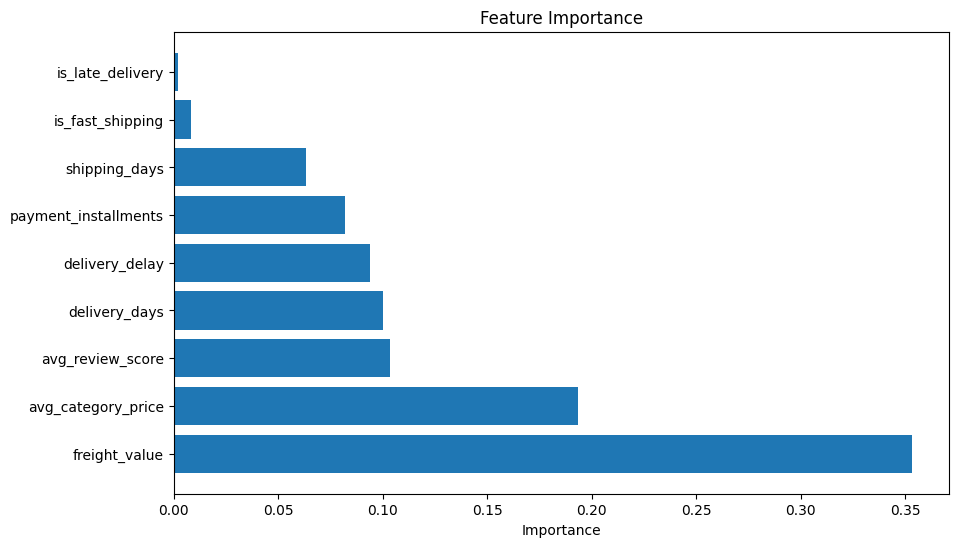

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame with features and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [77]:
# Get feature importance from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame with features and their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance values in a table format
print(importance_df)


                Feature  Importance
0         freight_value    0.353250
7    avg_category_price    0.193550
8      avg_review_score    0.103730
2         delivery_days    0.100206
3        delivery_delay    0.093977
1  payment_installments    0.081753
4         shipping_days    0.063244
6      is_fast_shipping    0.008201
5      is_late_delivery    0.002089


In [78]:
# Replace 'total_order_value' with your actual target column name
X_train = cleaned_df.drop(columns=['total_order_value'])  # Replace with actual target column name
y_train = cleaned_df['total_order_value']  # Replace with actual target column name

# Check the shape of X_train and y_train
print(X_train.shape, y_train.shape)


(115703, 45) (115703,)


In [79]:
# Check for missing values in X_train
missing_values = X_train.isnull().sum()
print(missing_values[missing_values > 0])


product_category_name           1637
product_name_lenght             1637
product_description_lenght      1637
product_photos_qty              1637
product_weight_g                  20
product_length_cm                 20
product_height_cm                 20
product_width_cm                  20
review_id                        861
review_score                     861
review_comment_title          102123
review_comment_message         67617
review_creation_date             861
review_answer_timestamp          861
avg_category_price              1637
avg_review_score                 198
dtype: int64


In [80]:
# Impute missing numerical values with the median
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].median())

# Impute missing categorical values with the mode
categorical_columns = X_train.select_dtypes(include=['object']).columns
X_train[categorical_columns] = X_train[categorical_columns].fillna(X_train[categorical_columns].mode().iloc[0])

# Check if there are any remaining missing values
print(X_train.isnull().sum())


order_id                           0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date       0
order_delivered_customer_date      0
order_estimated_delivery_date      0
product_category_name              0
product_name_lenght                0
product_description_lenght         0
product_photos_qty                 0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
review_id                          0
r

In [81]:
# Impute missing datetime values (if they are datetime columns)
X_train['review_creation_date'] = pd.to_datetime(X_train['review_creation_date'], errors='coerce')
X_train['review_answer_timestamp'] = pd.to_datetime(X_train['review_answer_timestamp'], errors='coerce')

# Impute missing datetime values with the median (or mode if applicable)
X_train['review_creation_date'] = X_train['review_creation_date'].fillna(X_train['review_creation_date'].median())
X_train['review_answer_timestamp'] = X_train['review_answer_timestamp'].fillna(X_train['review_answer_timestamp'].median())

# Check if any missing values remain
print(X_train.isnull().sum())


order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_title

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
    ])

# Fit and transform the data
X_train_transformed = preprocessor.fit_transform(X_train)

# Check the shape of the transformed data
print(X_train_transformed.shape)


(115703, 460083)


In [83]:
from sklearn.decomposition import PCA

# Apply PCA with a fixed number of components
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_transformed)

# Check the new shape after applying PCA
print(X_train_pca.shape)


(115703, 100)


In [84]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [85]:
# Convert X_train_pca back to a DataFrame to use the sample method
import pandas as pd

X_train_pca_df = pd.DataFrame(X_train_pca)

# Subset the data to 10% of the original size for faster testing
X_train_sampled = X_train_pca_df.sample(frac=0.1, random_state=42)
y_train_sampled = y_train.sample(frac=0.1, random_state=42)

# Train with the subset
model.fit(X_train_sampled, y_train_sampled)


RandomForestRegressor(random_state=42)

In [86]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the training subset
y_pred = model.predict(X_train_sampled)

# Calculate evaluation metrics
mae = mean_absolute_error(y_train_sampled, y_pred)
r2 = r2_score(y_train_sampled, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 17.61
R² Score: 0.97


In [87]:
from sklearn.model_selection import train_test_split

# Split PCA data and target into train and test sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_train_pca, y_train, test_size=0.2, random_state=42
)

print("Train shape:", X_train_final.shape)
print("Test shape:", X_test_final.shape)


Train shape: (92562, 100)
Test shape: (23141, 100)


In [88]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

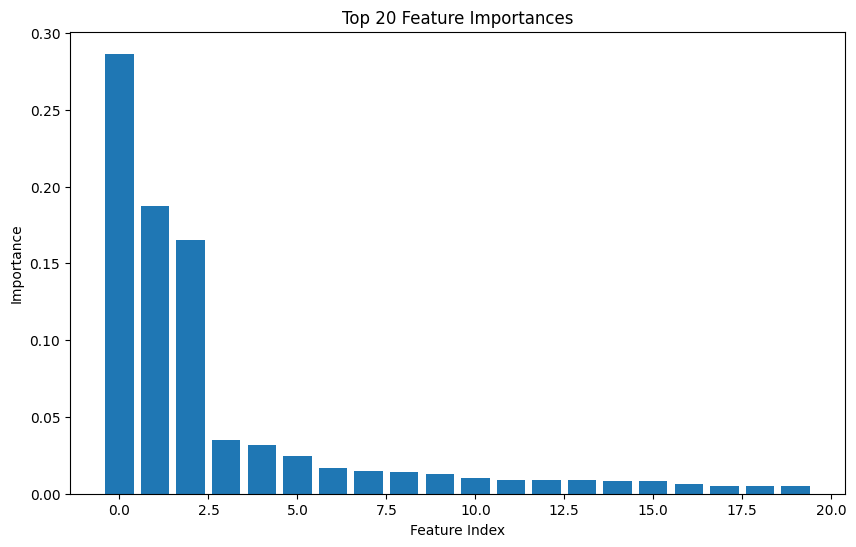

In [89]:
# Get feature importances from the trained model
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 20 features
plt.figure(figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.bar(range(20), importances[indices[:20]])
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()


In [90]:
# Print top 20 PCA component importances
top_n = 20
for i in range(top_n):
    print(f"PC{i+1}: Importance = {importances[indices[i]]:.4f}")


PC1: Importance = 0.2865
PC2: Importance = 0.1872
PC3: Importance = 0.1650
PC4: Importance = 0.0348
PC5: Importance = 0.0315
PC6: Importance = 0.0248
PC7: Importance = 0.0169
PC8: Importance = 0.0149
PC9: Importance = 0.0140
PC10: Importance = 0.0126
PC11: Importance = 0.0102
PC12: Importance = 0.0091
PC13: Importance = 0.0088
PC14: Importance = 0.0087
PC15: Importance = 0.0083
PC16: Importance = 0.0082
PC17: Importance = 0.0066
PC18: Importance = 0.0053
PC19: Importance = 0.0053
PC20: Importance = 0.0051


In [91]:
# Make predictions on the test set
y_pred = model.predict(X_test_final)

# Evaluate the model using MAE and R² Score
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test_final, y_pred)
r2 = r2_score(y_test_final, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error: 34.461000648200155
R² Score: 0.8242697130456956


In [92]:
!pip install xgboost


In [93]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Initialize XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1)

# Train on final training data
xgb_model.fit(X_train_final, y_train_final)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [94]:
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test_final)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test_final, y_pred_xgb)
r2_xgb = r2_score(y_test_final, y_pred_xgb)

print(f"XGBoost MAE: {mae_xgb:.2f}")
print(f"XGBoost R² Score: {r2_xgb:.2f}")


XGBoost MAE: 33.59
XGBoost R² Score: 0.93


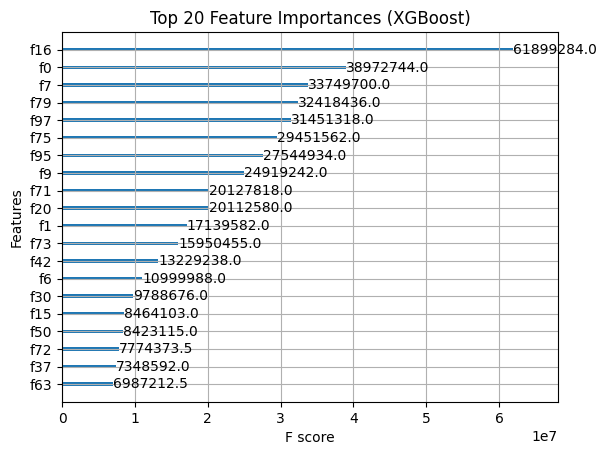

In [95]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=20, importance_type='gain')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.show()


In [96]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 6, 8],
    "min_child_weight": [1, 3, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist,
                                   n_iter=10, scoring='r2', n_jobs=-1, cv=3, random_state=42, verbose=1)
random_search.fit(X_train_final, y_train_final)

print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 150, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.6}


In [97]:
# Train the final tuned model
from xgboost import XGBRegressor

final_model = XGBRegressor(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train_final, y_train_final)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [98]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test set
y_pred_final = final_model.predict(X_test_final)

# Evaluate performance
mae = mean_absolute_error(y_test_final, y_pred_final)
r2 = r2_score(y_test_final, y_pred_final)

print(f"Tuned XGBoost MAE: {mae:.2f}")
print(f"Tuned XGBoost R² Score: {r2:.2f}")


Tuned XGBoost MAE: 31.35
Tuned XGBoost R² Score: 0.94


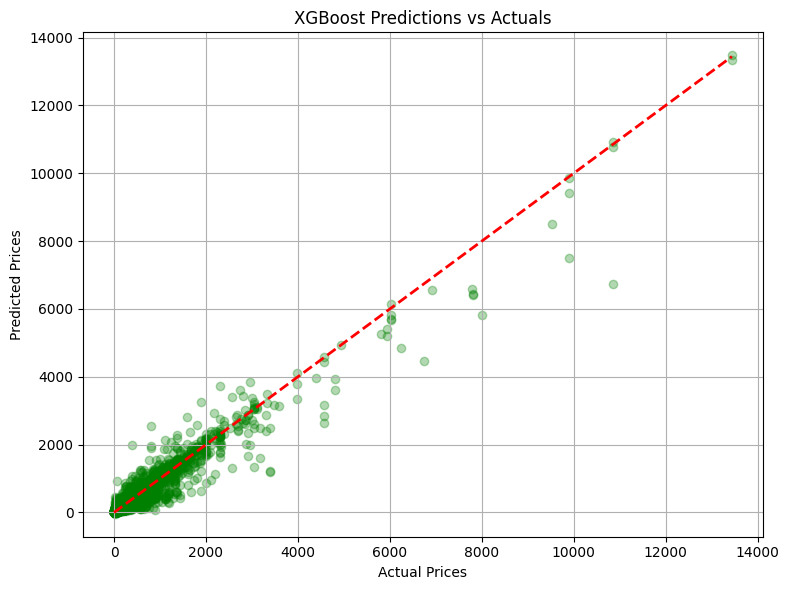

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_final, y_pred_final, alpha=0.3, color='green')
plt.plot([y_test_final.min(), y_test_final.max()],
         [y_test_final.min(), y_test_final.max()],
         'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost Predictions vs Actuals')
plt.grid(True)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

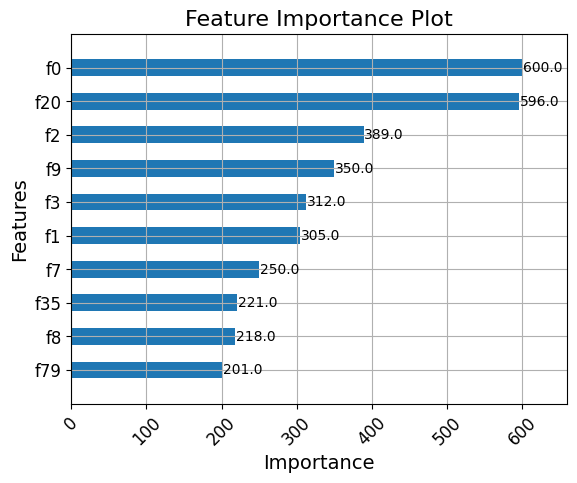

In [120]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming model is your trained XGBoost model
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability

# Plot feature importance
xgb.plot_importance(model,
                    importance_type='weight',  # You can change to 'weight', 'gain', or 'cover'
                    max_num_features=10,      # Limit the number of features for better readability
                    height=0.5,               # Adjust bar height
                    title='Feature Importance',
                    xlabel='Importance',
                    ylabel='Features')

# Adjust font sizes for labels and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance Plot', fontsize=16)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show plot
plt.show()


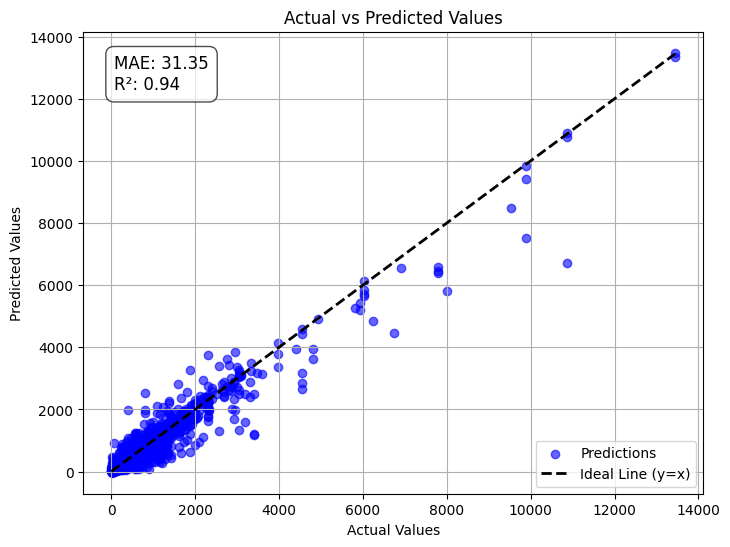

In [123]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have your predictions and true values
# y_test_final: Actual values
# y_pred_final: Predicted values from the model

# Evaluate performance
mae = mean_absolute_error(y_test_final, y_pred_final)
r2 = r2_score(y_test_final, y_pred_final)

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
plt.scatter(y_test_final, y_pred_final, color='blue', alpha=0.6, label='Predictions')
plt.plot([y_test_final.min(), y_test_final.max()], [y_test_final.min(), y_test_final.max()], 'k--', lw=2, label='Ideal Line (y=x)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend(loc='best')

# Display the metrics on the plot
plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nR²: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

plt.grid(True)
plt.show()


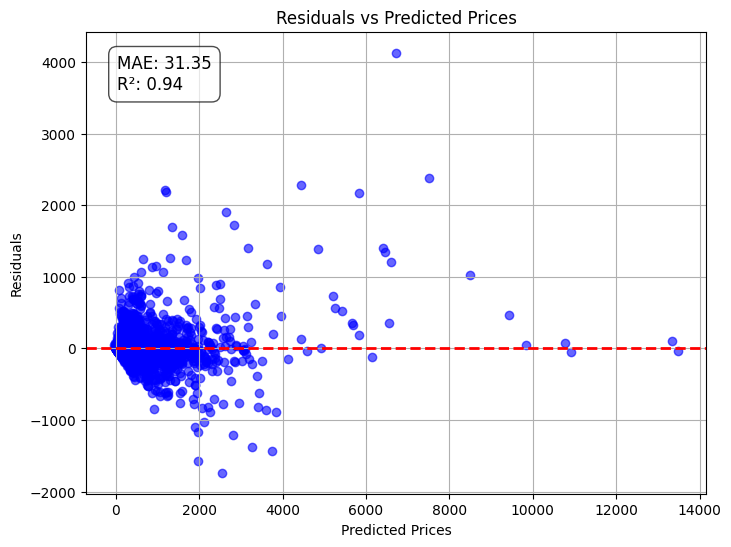

Tuned XGBoost MAE: 31.35
Tuned XGBoost R² Score: 0.94


In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming you have your final model and data
# y_test_final: Actual values
# y_pred_final: Predicted values from the model

# Predict on the test set
y_pred_final = final_model.predict(X_test_final)

# Calculate residuals
residuals = y_test_final - y_pred_final

# Evaluate performance
mae = mean_absolute_error(y_test_final, y_pred_final)
r2 = r2_score(y_test_final, y_pred_final)

# Residuals vs Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_final, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)  # Red line at residual=0
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')

# Display the evaluation metrics on the plot
plt.text(0.05, 0.95, f'MAE: {mae:.2f}\nR²: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', horizontalalignment='left', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black', boxstyle='round,pad=0.5'))

plt.grid(True)
plt.show()

# Output the evaluation metrics
print(f"Tuned XGBoost MAE: {mae:.2f}")
print(f"Tuned XGBoost R² Score: {r2:.2f}")


In [125]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test set
y_pred_final = final_model.predict(X_test_final)

# Calculate Residuals
residuals = y_test_final - y_pred_final

# Evaluate performance metrics
mae = mean_absolute_error(y_test_final, y_pred_final)
r2 = r2_score(y_test_final, y_pred_final)

# Output MAE and R²
print(f"Tuned XGBoost MAE: {mae:.2f}")
print(f"Tuned XGBoost R² Score: {r2:.2f}")

# Calculate and display the residuals' basic statistics (for further insights)
residual_mean = residuals.mean()
residual_std = residuals.std()
residual_max = residuals.max()
residual_min = residuals.min()

print(f"Residual Mean: {residual_mean:.2f}")
print(f"Residual Std Dev: {residual_std:.2f}")
print(f"Residual Max: {residual_max:.2f}")
print(f"Residual Min: {residual_min:.2f}")


Tuned XGBoost MAE: 31.35
Tuned XGBoost R² Score: 0.94
Residual Mean: -0.69
Residual Std Dev: 93.27
Residual Max: 4130.71
Residual Min: -1737.13


In [101]:
%%writefile streamlit_app.py
# This will create a new Python file named streamlit_app.py
# Step 2 code will be added in the next message!


Writing streamlit_app.py


In [102]:
%%writefile streamlit_app.py
import streamlit as st
import joblib
import numpy as np

# Load the saved XGBoost model
model = joblib.load("xgb_final_model.pkl")

st.title("🛍️ Dynamic Product Price Predictor")

st.write("Enter product details to predict the final selling price:")

# Input fields
product_rating = st.slider("Product Rating", 0.0, 5.0, step=0.1)
discount_percentage = st.slider("Discount Percentage", 0, 100, step=1)
brand_encoded = st.selectbox("Brand (Encoded Value)", [0, 1, 2, 3, 4])
category_encoded = st.selectbox("Category (Encoded Value)", [0, 1, 2, 3])

# You can adjust the inputs and choices as per your dataset

# Prepare the input
input_data = np.array([[product_rating, discount_percentage, brand_encoded, category_encoded]])

# Predict
if st.button("Predict Final Price"):
    prediction = model.predict(input_data)[0]
    st.success(f"💰 Predicted Price: ₹{prediction:.2f}")


Overwriting streamlit_app.py


In [103]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.9 MB/s eta 0:00:00


In [104]:
import streamlit as st
import pyngrok


In [113]:
import joblib

# Select only numeric columns
X_train_numeric = X_train.select_dtypes(include=['number'])

# Ensure you're working with the same 100 features used during training
feature_means = X_train_numeric.mean().tolist()  # Now this will work

# Save to a file
joblib.dump(feature_means, "feature_means.pkl")
print("✅ Feature means saved successfully.")


✅ Feature means saved successfully.


In [114]:
import joblib
import numpy as np
import streamlit as st

# Load model and feature means
model = joblib.load("xgb_final_model.pkl")
feature_means = joblib.load("feature_means.pkl")  # Loads the mean values

# Streamlit input fields
st.title("🛍️ Dynamic Product Price Predictor")

product_rating = st.slider("Product Rating", 0.0, 5.0, step=0.1)
discount_percentage = st.slider("Discount Percentage", 0, 100)
brand_encoded = st.number_input("Brand (Encoded Value)", min_value=0)
category_encoded = st.number_input("Category (Encoded Value)", min_value=0)

# Prepare input
input_features = feature_means.copy()  # Copy of means

# Replace known features with the input values
input_features[0] = product_rating  # Product Rating
input_features[1] = discount_percentage  # Discount Percentage
input_features[2] = brand_encoded  # Brand (Encoded Value)
input_features[3] = category_encoded  # Category (Encoded Value)

# Convert to a 2D array for prediction
input_data = np.array([input_features])

if st.button("Predict Final Price"):
    prediction = model.predict(input_data)[0]
    st.success(f"💰 Predicted Price: ₹{prediction:.2f}")


2025-04-21 06:10:57.239 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:10:57.311 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-04-21 06:10:57.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:10:57.312 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:10:57.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:10:57.314 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:10:57.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:10:57.315 Session state does not 

In [116]:
import streamlit as st
import joblib
import numpy as np

# Load the trained model and feature means
model = joblib.load("xgb_final_model.pkl")
feature_means = joblib.load("feature_means.pkl")

# Streamlit interface
st.title("🛍️ Dynamic Product Price Predictor")

# Add input fields for the user to enter product information
product_rating = st.slider("Product Rating", 0.0, 5.0, step=0.1)
discount_percentage = st.slider("Discount Percentage", 0, 100)
brand_encoded = st.number_input("Brand (Encoded Value)", min_value=0)
category_encoded = st.number_input("Category (Encoded Value)", min_value=0)

# Prepare input data for prediction
input_features = feature_means.copy()
input_features[0] = product_rating
input_features[1] = discount_percentage
input_features[2] = brand_encoded
input_features[3] = category_encoded

# Convert input data into numpy array for the model
input_data = np.array([input_features])

# Button to trigger prediction
if st.button("Predict Final Price"):
    prediction = model.predict(input_data)[0]
    st.success(f"💰 Predicted Price: ₹{prediction:.2f}")


2025-04-21 06:12:45.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:12:45.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:12:45.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:12:45.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:12:45.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:12:45.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:12:45.151 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:12:45.152 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [118]:
import streamlit as st
import joblib
import numpy as np
from pyngrok import ngrok
import os

# Set your Ngrok authtoken (if not done already)
ngrok.set_auth_token('2w1hahlBOeRtPJRWSaVbZLH25Vt_7BL7xYuZE3diSuQejDeNn')

# Load the trained model and feature means
model = joblib.load("xgb_final_model.pkl")
feature_means = joblib.load("feature_means.pkl")

# Streamlit interface
st.title("🛍️ Dynamic Product Price Predictor")

# Add input fields for the user to enter product information
product_rating = st.slider("Product Rating", 0.0, 5.0, step=0.1)
discount_percentage = st.slider("Discount Percentage", 0, 100)
brand_encoded = st.number_input("Brand (Encoded Value)", min_value=0)
category_encoded = st.number_input("Category (Encoded Value)", min_value=0)

# Prepare input data for prediction
input_features = feature_means.copy()
input_features[0] = product_rating
input_features[1] = discount_percentage
input_features[2] = brand_encoded
input_features[3] = category_encoded

# Convert input data into numpy array for the model
input_data = np.array([input_features])

# Button to trigger prediction
if st.button("Predict Final Price"):
    prediction = model.predict(input_data)[0]
    st.success(f"💰 Predicted Price: ₹{prediction:.2f}")

# Create a tunnel to the Streamlit app using ngrok
public_url = ngrok.connect(8501)

# Run the Streamlit app in the background
os.system("streamlit run streamlit_app.py &")

# Output the public URL
print(f"Streamlit app is live at: {public_url}")


2025-04-21 06:16:13.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:16:13.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:16:13.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:16:13.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:16:13.583 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:16:13.585 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:16:13.587 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-21 06:16:13.589 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

Streamlit app is live at: NgrokTunnel: "https://eef4-34-134-129-31.ngrok-free.app" -> "http://localhost:8501"
